In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [4]:
# read expression data
expr = pd.read_csv('data/TCGA.HNSC.expression.txt', sep='\t', header=0, index_col=[0,1])
print("expression data shape: ", expr.shape)
# read meta data
meta = pd.read_csv('data/TCGA.HNSC.metadata.txt', sep='\t', header=0, index_col=0)
print("meta data shape: ", meta.shape)
# get meta data per sample
meta = expr.reset_index()[['patient_id','sample_id']].join(meta, on='patient_id').set_index(['patient_id','sample_id'])
print("meta data shape: ", meta.shape)
meta.head()
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, TSNE
import umap
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import normalized_mutual_info_score


# Handle missing values in metadata
metadata = meta.fillna("Unknown")




from anndata import read_h5ad
adata = read_h5ad('data/TCGA.HNSC.embedded.h5ad')

expression data shape:  (545, 20531)
meta data shape:  (500, 18)
meta data shape:  (545, 18)


In [5]:
adata

AnnData object with n_obs × n_vars = 545 × 20262
    obs: 'type', 'age_at_initial_pathologic_diagnosis', 'gender', 'race', 'ajcc_pathologic_tumor_stage', 'histological_type', 'histological_grade', 'tumor_status', 'vital_status', 'OS', 'OS.time', 'DSS', 'DSS.time', 'DFI', 'DFI.time', 'PFI', 'PFI.time', 'Redaction', 'tissue_source_site'
    var: 'gene', 'n_cells', 'mean', 'std'
    uns: 'log1p'
    obsm: 'mds_1', 'mds_10', 'mds_2', 'mds_3', 'mds_4', 'mds_5', 'mds_6', 'mds_7', 'mds_8', 'mds_9', 'pca', 'pca_1', 'pca_10', 'pca_2', 'pca_3', 'pca_4', 'pca_5', 'pca_6', 'pca_7', 'pca_8', 'pca_9', 'tsne_1', 'tsne_2', 'tsne_3', 'umap_1', 'umap_10', 'umap_2', 'umap_3', 'umap_4', 'umap_5', 'umap_6', 'umap_7', 'umap_8', 'umap_9'

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from openTSNE import TSNE
import umap

from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
import hdbscan
from sklearn import mixture

from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import normalized_mutual_info_score

from time import time
import seaborn as sns

from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
kmeans = KMeans(n_clusters=7).fit_predict(adata.obsm["umap_1"])
print(silhouette_score(adata.obsm["umap_1"], kmeans))
clusterer_hierarchical = AgglomerativeClustering(n_clusters = 7).fit_predict(adata.obsm["umap_1"])
print(silhouette_score(adata.obsm["umap_1"], clusterer_hierarchical))
spectral_Clustering = SpectralClustering(n_clusters = 7).fit_predict(adata.obsm["umap_1"])
print(silhouette_score(adata.obsm["umap_1"], spectral_Clustering))
gmm = mixture.GaussianMixture(n_components = 7).fit_predict(adata.obsm["umap_1"])
print(silhouette_score(adata.obsm["umap_1"], gmm))
clusterer_hdbscan = hdbscan.HDBSCAN(min_cluster_size = 7).fit_predict(adata.obsm["umap_1"])
print(silhouette_score(adata.obsm["umap_1"], clusterer_hdbscan))

/home/gputest/.conda/envs/ece204/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.5875994
0.5318647
0.56845546
0.5844404
0.34720927


In [12]:
kmeans = KMeans(n_clusters=7).fit_predict(adata.obsm["umap_3"])
print(silhouette_score(adata.obsm["umap_3"], kmeans))
clusterer_hierarchical = AgglomerativeClustering(n_clusters = 7).fit_predict(adata.obsm["umap_3"])
print(silhouette_score(adata.obsm["umap_3"], clusterer_hierarchical))
spectral_Clustering = SpectralClustering(n_clusters = 7).fit_predict(adata.obsm["umap_3"])
print(silhouette_score(adata.obsm["umap_3"], spectral_Clustering))
gmm = mixture.GaussianMixture(n_components = 7).fit_predict(adata.obsm["umap_3"])
print(silhouette_score(adata.obsm["umap_3"], gmm))
clusterer_hdbscan = hdbscan.HDBSCAN(min_cluster_size = 7).fit_predict(adata.obsm["umap_3"])
print(silhouette_score(adata.obsm["umap_3"], clusterer_hdbscan))

/home/gputest/.conda/envs/ece204/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.43081462
0.43177772
0.43461588
0.4194158
0.123454295


In [11]:
kmeans = KMeans(n_clusters=7).fit_predict(adata.obsm["umap_5"])
print(silhouette_score(adata.obsm["umap_5"], kmeans))
clusterer_hierarchical = AgglomerativeClustering(n_clusters = 7).fit_predict(adata.obsm["umap_5"])
print(silhouette_score(adata.obsm["umap_5"], clusterer_hierarchical))
spectral_Clustering = SpectralClustering(n_clusters = 7).fit_predict(adata.obsm["umap_5"])
print(silhouette_score(adata.obsm["umap_5"], spectral_Clustering))
gmm = mixture.GaussianMixture(n_components = 7).fit_predict(adata.obsm["umap_5"])
print(silhouette_score(adata.obsm["umap_5"], gmm))
clusterer_hdbscan = hdbscan.HDBSCAN(min_cluster_size = 7).fit_predict(adata.obsm["umap_5"])
print(silhouette_score(adata.obsm["umap_5"], clusterer_hdbscan))

/home/gputest/.conda/envs/ece204/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.41863284
0.35213426
0.42318028
0.36076277
0.057079095


In [13]:
kmeans = KMeans(n_clusters=7).fit_predict(adata.obsm["umap_7"])
print(silhouette_score(adata.obsm["umap_7"], kmeans))
clusterer_hierarchical = AgglomerativeClustering(n_clusters = 7).fit_predict(adata.obsm["umap_7"])
print(silhouette_score(adata.obsm["umap_7"], clusterer_hierarchical))
spectral_Clustering = SpectralClustering(n_clusters = 7).fit_predict(adata.obsm["umap_7"])
print(silhouette_score(adata.obsm["umap_7"], spectral_Clustering))
gmm = mixture.GaussianMixture(n_components = 7).fit_predict(adata.obsm["umap_7"])
print(silhouette_score(adata.obsm["umap_7"], gmm))
clusterer_hdbscan = hdbscan.HDBSCAN(min_cluster_size = 7).fit_predict(adata.obsm["umap_7"])
print(silhouette_score(adata.obsm["umap_7"], clusterer_hdbscan))

/home/gputest/.conda/envs/ece204/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.42076248
0.4117972
0.42320433
0.38416922
0.06258464


In [17]:
kmeans = KMeans(n_clusters=7).fit_predict(adata.obsm["umap_9"])
print(silhouette_score(adata.obsm["umap_9"], kmeans))
clusterer_hierarchical = AgglomerativeClustering(n_clusters = 7).fit_predict(adata.obsm["umap_9"])
print(silhouette_score(adata.obsm["umap_9"], clusterer_hierarchical))
spectral_Clustering = SpectralClustering(n_clusters = 7).fit_predict(adata.obsm["umap_9"])
print(silhouette_score(adata.obsm["umap_9"], spectral_Clustering))
gmm = mixture.GaussianMixture(n_components = 7).fit_predict(adata.obsm["umap_9"])
print(silhouette_score(adata.obsm["umap_9"], gmm))
clusterer_hdbscan = hdbscan.HDBSCAN(min_cluster_size = 7).fit_predict(adata.obsm["umap_9"])
print(silhouette_score(adata.obsm["umap_9"], clusterer_hdbscan))

/home/gputest/.conda/envs/ece204/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.4193802
0.40608793
0.42165622
0.38058415
0.07112465


In [14]:
kmeans = KMeans(n_clusters=7).fit_predict(adata.obsm["tsne_1"])
print(silhouette_score(adata.obsm["tsne_1"], kmeans))
clusterer_hierarchical = AgglomerativeClustering(n_clusters = 7).fit_predict(adata.obsm["tsne_1"])
print(silhouette_score(adata.obsm["tsne_1"], clusterer_hierarchical))
spectral_Clustering = SpectralClustering(n_clusters = 7).fit_predict(adata.obsm["tsne_1"])
print(silhouette_score(adata.obsm["tsne_1"], spectral_Clustering))
gmm = mixture.GaussianMixture(n_components = 7).fit_predict(adata.obsm["tsne_1"])
print(silhouette_score(adata.obsm["tsne_1"], gmm))
clusterer_hdbscan = hdbscan.HDBSCAN(min_cluster_size = 7).fit_predict(adata.obsm["tsne_1"])
print(silhouette_score(adata.obsm["tsne_1"], clusterer_hdbscan))

/home/gputest/.conda/envs/ece204/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.56418085
0.54740983
0.5540157
0.56078273
0.35716417


In [15]:
kmeans = KMeans(n_clusters=7).fit_predict(adata.obsm["tsne_3"])
print(silhouette_score(adata.obsm["tsne_3"], kmeans))
clusterer_hierarchical = AgglomerativeClustering(n_clusters = 7).fit_predict(adata.obsm["tsne_3"])
print(silhouette_score(adata.obsm["tsne_3"], clusterer_hierarchical))
spectral_Clustering = SpectralClustering(n_clusters = 7).fit_predict(adata.obsm["tsne_3"])
print(silhouette_score(adata.obsm["tsne_3"], spectral_Clustering))
gmm = mixture.GaussianMixture(n_components = 7).fit_predict(adata.obsm["tsne_3"])
print(silhouette_score(adata.obsm["tsne_3"], gmm))
clusterer_hdbscan = hdbscan.HDBSCAN(min_cluster_size = 7).fit_predict(adata.obsm["tsne_3"])
print(silhouette_score(adata.obsm["tsne_3"], clusterer_hdbscan))

/home/gputest/.conda/envs/ece204/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.27218714
0.20367196
-0.27796945
0.22721039
0.022445178


In [20]:
kmeans = KMeans(n_clusters=7).fit_predict(adata.obsm["mds_1"])
print(silhouette_score(adata.obsm["mds_1"], kmeans))
clusterer_hierarchical = AgglomerativeClustering(n_clusters = 7).fit_predict(adata.obsm["mds_1"])
print(silhouette_score(adata.obsm["mds_1"], clusterer_hierarchical))
spectral_Clustering = SpectralClustering(n_clusters = 7).fit_predict(adata.obsm["mds_1"])
print(silhouette_score(adata.obsm["mds_1"], spectral_Clustering))
gmm = mixture.GaussianMixture(n_components = 7).fit_predict(adata.obsm["mds_1"])
print(silhouette_score(adata.obsm["mds_1"], gmm))
clusterer_hdbscan = hdbscan.HDBSCAN(min_cluster_size = 7).fit_predict(adata.obsm["mds_1"])
print(silhouette_score(adata.obsm["mds_1"], clusterer_hdbscan))

/home/gputest/.conda/envs/ece204/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/gputest/.conda/envs/ece204/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


0.52077806
0.50563776
0.45051792
0.512018
0.13904503


/home/gputest/.conda/envs/ece204/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited at iteration 2000 with accuracies 
[6.88018744e-15 2.04365590e-06 1.31987339e-06 1.77555086e-06
 1.23784251e-06 2.11684216e-06 1.37192103e-05 1.99984224e-05]
not reaching the requested tolerance 8.121132850646973e-06.
Use iteration 1805 instead with accuracy 
3.129210996891885e-06.

  _, diffusion_map = lobpcg(
/home/gputest/.conda/envs/ece204/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited postprocessing with accuracies 
[3.71187304e-15 1.90459777e-06 1.41565272e-06 2.04595992e-06
 1.81139027e-06 2.02967280e-06 6.44647163e-06 9.37985614e-06]
not reaching the requested tolerance 8.121132850646973e-06.
  _, diffusion_map = lobpcg(
/home/gputest/.conda/envs/ece204/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:420: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (7). Possibly du

In [18]:
kmeans = KMeans(n_clusters=7).fit_predict(adata.obsm["mds_5"])
print(silhouette_score(adata.obsm["mds_5"], kmeans))
clusterer_hierarchical = AgglomerativeClustering(n_clusters = 7).fit_predict(adata.obsm["mds_5"])
print(silhouette_score(adata.obsm["mds_5"], clusterer_hierarchical))
spectral_Clustering = SpectralClustering(n_clusters = 7).fit_predict(adata.obsm["mds_5"])
print(silhouette_score(adata.obsm["mds_5"], spectral_Clustering))
gmm = mixture.GaussianMixture(n_components = 7).fit_predict(adata.obsm["mds_5"])
print(silhouette_score(adata.obsm["mds_5"], gmm))
clusterer_hdbscan = hdbscan.HDBSCAN(min_cluster_size = 7).fit_predict(adata.obsm["mds_5"])
print(silhouette_score(adata.obsm["mds_5"], clusterer_hdbscan))

/home/gputest/.conda/envs/ece204/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/gputest/.conda/envs/ece204/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


0.16105366
0.09900263
-0.34480003
0.11019834
-0.0077707814


/home/gputest/.conda/envs/ece204/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


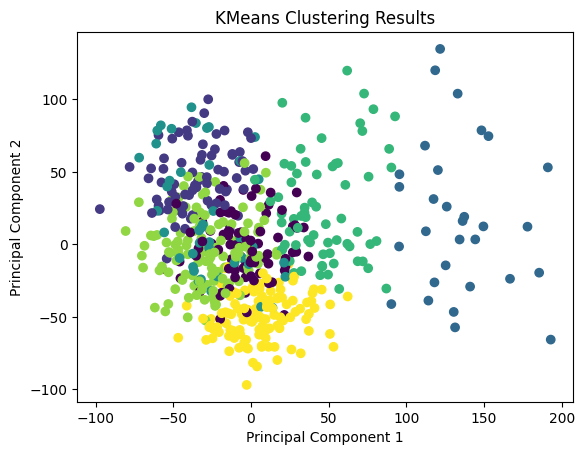

In [7]:
from anndata import read_h5ad
adata = read_h5ad('data/TCGA.HNSC.embedded.h5ad')
embedding_pca=adata.obsm['pca']

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# Fit KMeans model
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(embedding_pca)

# Get cluster labels
labels = kmeans.labels_


# Plot results
plt.scatter(embedding_pca[:, 0], embedding_pca[:, 1], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering Results')
plt.show()

/home/gputest/.conda/envs/ece204/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


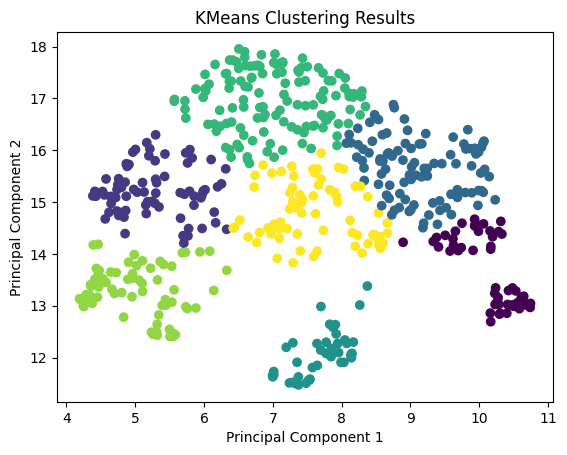

In [8]:
embedding_umap=adata.obsm['umap']

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# Fit KMeans model
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(embedding_umap)

# Get cluster labels
labels = kmeans.labels_


# Plot results
plt.scatter(embedding_umap[:, 0], embedding_umap[:, 1], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering Results')
plt.show()

/home/gputest/.conda/envs/ece204/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


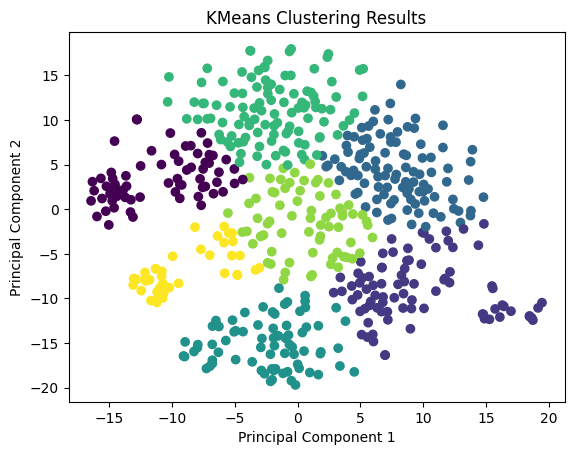

In [9]:
embedding_tsne=adata.obsm['tsne']

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# Fit KMeans model
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(embedding_tsne)

# Get cluster labels
labels = kmeans.labels_


# Plot results
plt.scatter(embedding_tsne[:, 0], embedding_tsne[:, 1], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering Results')
plt.show()

/home/gputest/.conda/envs/ece204/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


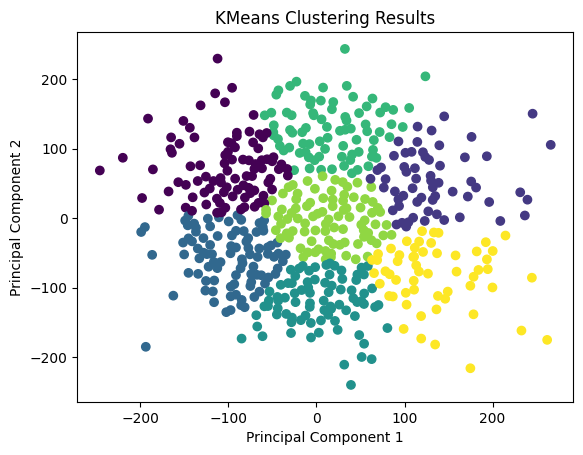

In [10]:
embedding_mds=adata.obsm['mds']

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# Fit KMeans model
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(embedding_mds)

# Get cluster labels
labels = kmeans.labels_


# Plot results
plt.scatter(embedding_mds[:, 0], embedding_mds[:, 1], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering Results')
plt.show()

In [4]:
labels

array([4, 4, 4, 6, 5, 1, 6, 6, 6, 1, 0, 6, 5, 6, 1, 5, 0, 6, 1, 6, 6, 2,
       0, 0, 1, 0, 2, 2, 4, 4, 0, 5, 0, 6, 0, 0, 1, 1, 4, 1, 0, 1, 4, 5,
       0, 5, 4, 6, 4, 6, 6, 6, 5, 6, 6, 0, 5, 5, 0, 0, 5, 6, 1, 5, 5, 5,
       1, 5, 1, 5, 5, 0, 5, 5, 1, 5, 5, 0, 6, 5, 5, 5, 5, 5, 1, 1, 6, 1,
       5, 5, 5, 5, 5, 5, 0, 5, 1, 0, 0, 5, 1, 5, 6, 5, 0, 6, 1, 6, 6, 0,
       4, 4, 4, 4, 4, 0, 0, 4, 4, 4, 0, 1, 4, 0, 6, 5, 6, 6, 5, 5, 6, 0,
       4, 5, 6, 5, 6, 5, 3, 6, 5, 0, 5, 0, 6, 6, 6, 6, 6, 6, 5, 6, 5, 0,
       5, 4, 6, 6, 6, 0, 1, 0, 1, 1, 1, 1, 1, 6, 1, 1, 5, 5, 5, 1, 1, 1,
       5, 1, 5, 6, 6, 6, 0, 6, 5, 1, 0, 1, 1, 5, 6, 1, 5, 5, 5, 5, 5, 5,
       1, 5, 1, 5, 0, 5, 5, 5, 6, 5, 1, 1, 5, 1, 1, 1, 0, 1, 0, 6, 6, 0,
       0, 6, 1, 5, 4, 6, 5, 2, 6, 6, 5, 6, 6, 4, 2, 4, 0, 3, 5, 3, 0, 3,
       0, 3, 4, 6, 3, 1, 3, 0, 0, 5, 5, 3, 4, 1, 5, 0, 6, 6, 6, 6, 3, 6,
       3, 5, 3, 0, 3, 5, 3, 0, 3, 6, 5, 0, 3, 6, 5, 3, 6, 1, 0, 3, 5, 5,
       3, 5, 0, 3, 5, 3, 6, 6, 3, 5, 3, 5, 5, 3, 1,

In [6]:
import seaborn as sns
sns.scatterplot(data=adata, x=embedding_pca[:, 1], y=embedding_pca[:, 2], hue="Gender")

AttributeError: AnnData has no attribute __contains__, don’t check `in adata`.